# 1. Getting started / Setup¶

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sms
import statsmodels.api as sm
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

from IPython.display import Image

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.special import boxcox1p
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


<span style='font-family:Tahoma'>   </span>

In [ ]:
df = pd.read_csv("/Users/brittarover/Capstone/Drivendata_flu_pred/training_set_features.csv")

In [ ]:
labels = pd.read_csv("/Users/brittarover/Capstone/Drivendata_flu_pred/training_set_labels.csv")

In [ ]:
df.head().T

In [ ]:
labels.head()

In [ ]:
df= pd.concat([df,labels],axis=1)

In [ ]:
df.head().T

In [ ]:
df.shape

<span style='font-family:Tahoma'>   
# Getting a feeling for my data & Business understanding</span>

<span style='font-family:Tahoma'>   

### Check columns / Definition

- **h1n1_concern** - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- **h1n1_knowledge** - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- **behavioral_antiviral_meds** - Has taken antiviral medications. (binary)
- **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)
- **behavioral_face_mask** - Has bought a face mask. (binary)
- **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)
- **behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)
- **behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)
- **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)
- **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)
- **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)
- **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- **child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)
- **health_worker** - Is a healthcare worker. (binary)
- **health_insurance** - Has health insurance. (binary)
- **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **age_group** - Age group of respondent.
- **education** - Self-reported education level.
- **race** - Race of respondent.
- **sex** - Sex of respondent.
- **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- **marital_status** - Marital status of respondent.
- **rent_or_own** - Housing situation of respondent.
- **employment_status** - Employment status of respondent.
- **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- **household_adults** - Number of other adults in household, top-coded to 3.
- **household_children** - Number of children in household, top-coded to 3.
- **employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.
- **employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.


  

    

### Research


### Getting a feeling for my data

In [ ]:
df.columns

In [ ]:
# check dtypes
df.info()

In [ ]:
# check how many dtypes each
df.select_dtypes('bool').columns

In [ ]:
df.nunique()

In [ ]:
# statistical insights 
df.describe().T

### Check for duplicates

In [ ]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

### Check distribution

In [ ]:
# Look at data skew; the skewness of values along an axis, returning 0 where all values are equal or if they follow 
# a normal distribution
df.skew()

In [ ]:
# Number of unique values for each column, sorted by count
df.T.apply(lambda x: x.nunique(), axis=1).sort_values(ascending=False)

### Check our target

In [ ]:
print('No. of sick persons') 
print(df['h1n1_vaccine'].groupby(df.h1n1_vaccine).agg('count'))

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="h1n1_vaccine", data=df, palette="OrRd")
plt.title('Distribution h1n1 vaccine')

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x="seasonal_vaccine", data=df, palette="PuBu")
plt.title('Distribution seasonal flu vaccine')

### First Conclusions

In [ ]:
#First we create a new DataFrame with only numerical features
numerics = ['int64', 'float64']

num_df = df.select_dtypes(include=numerics)

In [ ]:
#Korrelationsanalyse
corr = num_df
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_simple.png')
plt.show

# Data Cleaning & Preparation

### Check Null Values

In [195]:
# checking null values
nan = pd.DataFrame(df.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/df.shape[0]*100,1)
print(nan[nan.Count!=0])

                      Count  Percentage
doctor_recc_h1n1       2160         8.1
doctor_recc_seasonal   2160         8.1
health_insurance      12274        46.0


In [ ]:
# plot of entries with null values
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues_r');

### Clean Null Values

In [ ]:
# Replace missing values with 0 for columns
df['h1n1_concern']=df['h1n1_concern'].fillna(0)
df.h1n1_concern.isnull().sum()

In [ ]:
df.h1n1_knowledge=df.h1n1_knowledge.fillna(0)

In [ ]:
df.health_worker=df.health_worker.fillna(0)

In [ ]:
df.behavioral_antiviral_meds=df.behavioral_antiviral_meds.fillna(0)
df.behavioral_avoidance=df.behavioral_avoidance.fillna(0)           
df.behavioral_face_mask=df.behavioral_face_mask.fillna(0)            
df.behavioral_wash_hands=df.behavioral_wash_hands.fillna(0)
df.behavioral_large_gatherings=df.behavioral_large_gatherings.fillna(0)
df.behavioral_outside_home=df.behavioral_outside_home.fillna(0)
df.behavioral_touch_face=df.behavioral_touch_face.fillna(0) 

In [ ]:
df.opinion_h1n1_vacc_effective=df.opinion_h1n1_vacc_effective.fillna(0)
df.opinion_h1n1_risk =df.opinion_h1n1_risk.fillna(0)
df.opinion_h1n1_sick_from_vacc=df.opinion_h1n1_sick_from_vacc.fillna(0)
df.opinion_seas_vacc_effective=df.opinion_seas_vacc_effective.fillna(0)
df.opinion_seas_risk=df.opinion_seas_risk.fillna(0)
df.opinion_seas_sick_from_vacc=df.opinion_seas_sick_from_vacc.fillna(0)

In [ ]:
df.household_adults.mean().round(0)

In [ ]:
df.household_children.mean().round(0)

In [ ]:
df.child_under_6_months.mean().round(0)

In [ ]:
df.chronic_med_condition.mean().round(0)

In [ ]:
df.rent_or_own.value_counts()

In [ ]:
# Replace missing values with the mean of the columns
df.household_adults=df.household_adults.fillna(1)
df.household_children=df.household_children.fillna(1)
df.child_under_6_months=df.child_under_6_months.fillna(0)
df.rent_or_own=df.rent_or_own.fillna('Own')

In [ ]:
df.chronic_med_condition=df.chronic_med_condition.fillna(0)

In [ ]:
df.employment_status=df.employment_status.fillna("not_filled")
df.employment_industry=df.employment_industry.fillna("not_filled")
df.employment_occupation=df.employment_occupation.fillna("not_filled")
df.education=df.education.fillna("not_filled")
df.income_poverty=df.income_poverty.fillna("not_filled")
df.marital_status=df.marital_status.fillna("not_filled")

In [211]:
df.doctor_recc_h1n1=df.doctor_recc_h1n1.fillna("not_filled")
df.doctor_recc_seasonal=df.doctor_recc_seasonal.fillna("not_filled")
df.health_insurance=df.health_insurance.fillna("not_filled")

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

# Data Exploration

## Labels

**Conclusions**
- `Both labels have a positive correlation which is not rather surprising. Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine. While a minority of people who got the seasonal vaccine got the H1N1 vaccine, they got the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine.`

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = df.shape[0]

(df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [ ]:
pd.crosstab(
    df["h1n1_vaccine"], 
    df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)


## Features

### Explore concern and knowledge regarding H1N1


**Conclusions**
- `Correlation between attitude towards vaccine against H1N1 and knowledge and concern about the disease.`


In [ ]:
# value_counts
counts=df.groupby(['h1n1_vaccine','h1n1_concern']).size().unstack('h1n1_vaccine')
h1n1_concern_counts = counts.sum(axis='columns')
percentage = counts.div(h1n1_concern_counts, axis='index')
percentage.rename(columns={0: "h1n1_vaccine_0", 1: "h1n1_vaccine_1"},inplace=True)
percentage

In [ ]:
plt.figure(figsize=(20,3))
ax = percentage.plot.barh(stacked=True)
ax.invert_yaxis()
#ax.title('Impact of h1n1_concern')
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)


In [ ]:
# value_counts
counts_2=df.groupby(['h1n1_vaccine','h1n1_knowledge']).size().unstack('h1n1_vaccine')
h1n1_knowledge_counts = counts_2.sum(axis='columns')
percentage_2 = counts_2.div(h1n1_knowledge_counts, axis='index')
percentage_2.rename(columns={0: "h1n1_vaccine_0", 1: "h1n1_vaccine_1"},inplace=True)
percentage_2

In [ ]:
plt.figure(figsize=(20,3))
ax = percentage_2.plot.barh(stacked=True)
ax.invert_yaxis()
#ax.title('Impact of h1n1_knowledge')
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

### Risk Avoidance

In [302]:
# new feature sum behavioral_changes
df['behavioral_changes']=df.behavioral_antiviral_meds+df.behavioral_wash_hands+df.behavioral_touch_face+df.behavioral_outside_home+df.behavioral_large_gatherings+df.behavioral_face_mask+df.behavioral_avoidance

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.countplot(x='behavioral_changes',hue='h1n1_vaccine',palette='PuBu',data=df)
plt.title('Relationsship between behavirol changes and h1n1_vaccine')

plt.subplot(1,2,2)
sns.countplot(x='behavioral_changes',hue='seasonal_vaccine',palette='OrRd',data=df)
plt.title('Relationsship between behavirol changes and seasonal_vaccine')

In [ ]:
# value_counts
counts_3=df.groupby(['h1n1_vaccine','behavioral_changes']).size().unstack('h1n1_vaccine')
h1n1_behchange_counts = counts_3.sum(axis='columns')
percentage_3 = counts_3.div(h1n1_behchange_counts, axis='index')
percentage_3.rename(columns={0: "h1n1_vaccine_0", 1: "h1n1_vaccine_1"},inplace=True)
counts_4=df.groupby(['seasonal_vaccine','behavioral_changes']).size().unstack('seasonal_vaccine')
h1n1_behchange_counts = counts_4.sum(axis='columns')
percentage_4 = counts_4.div(h1n1_behchange_counts, axis='index')
percentage_4.rename(columns={0: "seas_vaccine_0", 1: "seas_vaccine_1"},inplace=True)


In [ ]:
plt.figure(figsize=(10,3))
percentage_3.plot.barh(stacked=True)
plt.title('Impact of behavioral_changes to h1n1_vaccine')
plt.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [ ]:
plt.figure(figsize=(10,3))
percentage_4.plot.barh(stacked=True)
plt.title('Impact of behavioral_changes to seasonal_vaccine')
plt.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='seasonal_vaccine'
)

### Risk Assessment towards Illness and sideeffects of Vaccine


**Conclusions**
- `ausformulieren`


In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.countplot(x='opinion_h1n1_risk',hue='h1n1_vaccine',palette='PuBu',data=df)
plt.title('Risk Assessment towards Illness-H1N1')

plt.subplot(1,2,2)
sns.countplot(x='opinion_h1n1_sick_from_vacc',hue='h1n1_vaccine',palette='OrRd',data=df)
plt.title('Risk Assessment towards sideeffects')

### Impact of doctors recommendations

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.countplot(x='doctor_recc_h1n1',hue='h1n1_vaccine',palette='PuBu',data=df)
plt.title('Recommendation H1N1 vaccine')

plt.subplot(1,2,2)
sns.countplot(x='doctor_recc_seasonal',hue='seasonal_vaccine',palette='OrRd',data=df)
plt.title('Recommendation seasonal vaccine')

### Attitude towards Vaccines  effectiveness

**Conclusions**
- `ausformulieren`

In [ ]:
g=sns.displot(df, x="opinion_h1n1_vacc_effective",hue='h1n1_vaccine', kind='kde')
g.fig.set_size_inches(15,6)
plt.title('Attitude towards H1N1 vaccine in dependency to the effectiveness')

In [ ]:
g=sns.displot(df, x="opinion_seas_vacc_effective",hue='seasonal_vaccine', kind='kde')
g.fig.set_size_inches(15,6)
plt.title('Attitude towards seas. flu in dependency to the effectiveness')

#### Overall Attitude towards Vacciness 

In [ ]:
vaccine_all = ['h1n1_vaccine', 'seasonal_vaccine']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[vaccine_all[0]], df[vaccine_all[1]]).style.background_gradient(cmap = cm)

### In dependency of the Age

**Conclusions**
- `There is a positive correlation between attitude towards vaccines and the age of a person. The vacciness quote increases with the age. This is valid for both vacciness, but for seasonal flu there is a stronger relationship. `


In [ ]:
df.age_group.value_counts(normalize=True)

In [ ]:
df['age_rank']=df.age_group.apply(lambda x: 1 if x=='18 - 34 Years' else 2 if x=='35 - 44 Years' else 3 if x=='45 - 54 Years'
                                  else 4 if x=='55 - 64 Years' else 5 if x=='65+ Years' else 0)

In [ ]:
df=df.sort_values('age_rank')

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(x='age_group',hue='h1n1_vaccine',data=df,palette='PuBu')
plt.title('Attitude towards H1N1 vaccine in dependency of the age')

plt.subplot(1,2,2)
sns.countplot(x='age_group',hue='seasonal_vaccine',data=df,palette='OrRd')
plt.title('Attitude towards Seas. vaccine in dependency of the age')

In [ ]:
# Breaking down by age / h1n1
df_age = df.groupby(['age_group','h1n1_vaccine'])['age_group'].count().reset_index(name='count')
df_age["sum_counts"] = df_age.groupby('age_group')['count'].transform('sum')
df_age["percent"] = df_age['count']/df_age["sum_counts"]
df_age = df_age.query('h1n1_vaccine==1')
df_age["total"]=df_age.sum_counts/26707

In [ ]:
# Breaking down by age / seasonal flu
df_age_seas = df.groupby(['age_group','seasonal_vaccine'])['age_group'].count().reset_index(name='count')
df_age_seas["sum_counts"] = df_age_seas.groupby('age_group')['count'].transform('sum')
df_age_seas["percent"] = df_age_seas['count']/df_age_seas["sum_counts"]
df_age_seas = df_age_seas.query('seasonal_vaccine==1')
df_age_seas["total"]=df_age_seas.sum_counts/26707

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

chart=sns.barplot(data=df_age, x="age_group", y="percent",palette='PuBu')
plt.title("Vaccines H1N1 (%) per Age Group", fontsize=12)
plt.xlabel("Age Group")
plt.ylabel("Vaccines (%)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)

chart=sns.barplot(data=df_age_seas, x="age_group", y="percent",palette='OrRd')
plt.title("Vaccines Seasonal Flu (%) per Age Group", fontsize=12)
plt.xlabel("Age Group")
plt.ylabel("Vaccines (%)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.show()

### In dependency of the sex

**Conclusions**
- `Correlation between attitude towards vaccine the sex of a person. The vaccination readiness is higher for females`


In [ ]:
df.sex.value_counts(normalize=True)

In [ ]:
# Breaking down by sex / h1n1
df_sex = df.groupby(['sex','h1n1_vaccine'])['sex'].count().reset_index(name='count')
df_sex["sum_counts"] = df_sex.groupby('sex')['count'].transform('sum')
df_sex["percent"] = df_sex['count']/df_sex["sum_counts"]
df_sex = df_sex.query('h1n1_vaccine==1')
df_sex["total"]=df_sex.sum_counts/26707

In [ ]:
# Breaking down by sex / seasonal flu
df_sex_seas = df.groupby(['sex','seasonal_vaccine'])['sex'].count().reset_index(name='count')
df_sex_seas["sum_counts"] = df_sex_seas.groupby('sex')['count'].transform('sum')
df_sex_seas["percent"] = df_sex_seas['count']/df_sex_seas["sum_counts"]
df_sex_seas = df_sex_seas.query('seasonal_vaccine==1')
df_sex_seas["total"]=df_sex_seas.sum_counts/26707

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

chart=sns.barplot(data=df_sex, x="sex", y="percent",palette='Blues')
plt.title("Vaccines H1N1 (%) in dependency of sex", fontsize=12)
plt.xlabel("Sex")
plt.ylabel("Vaccines (%)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)

chart=sns.barplot(data=df_sex_seas, x="sex", y="percent",palette='Reds')
#for index, row in df_sex_seas.iterrows():
#    chart.text(row.name,row.percent, round(row.percent,2), color='black', ha="center")

plt.title("Vaccines Seasonal Flu (%) in dependency of sex", fontsize=12)
plt.xlabel("Sex")
plt.ylabel("Vaccines (%)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.show()


#### Has the marital_status any impact?

**Conclusions**
- `There is a positive correlation between attitude towards vaccines and marital status of a person. But only for males. For females the values for vaccine readiness concerning the seasonal flu are nearly the same.`

In [ ]:
df.marital_status.value_counts()

In [ ]:
df.groupby(['sex']).marital_status.value_counts()

In [ ]:
df_sex_seas_m=df.groupby(['seasonal_vaccine','sex'])['marital_status'].value_counts().reset_index(name='sum')
df_sex_seas_m["sum_counts"] = df_sex_seas_m.groupby(['sex','marital_status'])['sum'].transform('sum')
df_sex_seas_m["percent"] = df_sex_seas_m['sum']/df_sex_seas_m["sum_counts"]
df_sex_seas_m=df_sex_seas_m[df_sex_seas_m['seasonal_vaccine']==1]
df_sex_seas_m

In [ ]:
df_sex_m=df.groupby(['h1n1_vaccineh','sex'])['marital_status'].value_counts().reset_index(name='sum')
df_sex_m["sum_counts"] = df_sex_m.groupby(['sex','marital_status'])['sum'].transform('sum')
df_sex_m["percent"] = df_sex_m['sum']/df_sex_seas_m["sum_counts"]
df_sex_m=df_sex_m[df_sex_m['h1n1_vaccine']==1]

In [ ]:
df_sex_m

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x='marital_status',y='percent',data=df_sex_seas_m,palette='OrRd')
plt.title('Seasonal Flu vaccine in % in dependency of the sex / Male')

plt.subplot(1,2,2)
sns.barplot(x='marital_status',y='percent',data=df_sex_m[df_sex_m.sex=='Male'],palette='PuBu')
plt.title('H1N1 vaccine in % in dependency of the sex / Male')

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x='marital_status',y='percent',data=df_sex_seas_m[df_sex_seas_m.sex=='Female'],palette='OrRd')
plt.title('Seasonal Flu vaccine in % in dependency of the sex / Male')

plt.subplot(1,2,2)
sns.barplot(x='marital_status',y='percent',data=df_sex_m[df_sex_seas_m.sex=='Female'],palette='PuBu')
plt.title('H1N1 vaccine in % in dependency of the sex / Male')

### Householdsize

In [303]:
df['household_size']=df.household_children+df.household_adults+1

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

chart=sns.barplot(data=df, x="household_children", y="h1n1_vaccine",palette='PuBu')
#plt.title("Vaccines H1N1 (%) per Age Group", fontsize=12)
plt.xlabel("Age Group")
plt.ylabel("Vaccines (%)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)

chart=sns.barplot(data=df, x="household_children", y="seasonal_vaccine",palette='OrRd')
plt.title("Vaccines Seasonal Flu (%) per Age Group", fontsize=12)
plt.xlabel("Age Group")
plt.ylabel("Vaccines (%)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.show()

### Has the number of kinds any impact?

In [ ]:
df.household_children.value_counts(sort=True)

In [ ]:
pd.pivot_table(df, values='seasonal_vaccine', index='household_children', columns='sex',margins=True)

In [ ]:
pd.pivot_table(df, values='seasonal_vaccine', index='child_under_6_months', columns='sex',margins=True)

In [ ]:
pd.pivot_table(df, values='h1n1_vaccine', index='household_children', columns='sex',margins=True)

In [ ]:
pd.pivot_table(df, values='h1n1_vaccine', index='child_under_6_months', columns='sex',margins=True)

**First Conclusion** <span style='background:yellow'>  The number of kinds has no significant impact to the attitude towards the vaccines against seasonal flu and h1n1 flu.  </span>


### Dependency of the employment

#### Health worker yes / no

**Conclusions**
- `The correlation between beeing a health worker and vaccination readiness is high. This is valid for males and females and for all age groups. This is not suprising because of the higher risk of getting sick`

In [ ]:
df.health_worker.value_counts(sort=True)

In [ ]:
pd.pivot_table(df, values='h1n1_vaccine', index='health_worker', columns='sex',margins=True)

In [ ]:
pd.pivot_table(df, values='h1n1_vaccine', index='health_worker', columns='age_group',margins=True)

In [ ]:
pd.pivot_table(df, values='seasonal_vaccine', index='health_worker', columns='sex',margins=True)

In [ ]:
pd.pivot_table(df, values='seasonal_vaccine', index='health_worker', columns='age_group',margins=True)

#### employment_industry and occupation

**Conclusions**
- `There is a correlation between employment_industry and the vacciness readiness`

In [196]:
df.employment_industry.value_counts(sort=True)

not_filled    13330
fcxhlnwr       2468
wxleyezf       1804
ldnlellj       1231
pxcmvdjn       1037
atmlpfrs        926
arjwrbjb        871
xicduogh        851
mfikgejo        614
vjjrobsf        527
rucpziij        523
xqicxuve        511
saaquncn        338
cfqqtusy        325
nduyfdeo        286
mcubkhph        275
wlfvacwt        215
dotnnunm        201
haxffmxo        148
msuufmds        124
phxvnwax         89
qnlwzans         13
Name: employment_industry, dtype: int64

In [197]:
pivot2=pd.pivot_table(df, values='seasonal_vaccine', index='employment_industry', columns='sex',margins=True)
result = pivot2.sort_values(('All'), ascending=False)
result.All.nlargest(5)

employment_industry
haxffmxo      0.844595
fcxhlnwr      0.638169
qnlwzans      0.538462
not_filled    0.508102
All           0.465608
Name: All, dtype: float64

In [198]:
pd.pivot_table(df, values='h1n1_vaccine', index='employment_industry', columns='sex',margins=True)
result2 = pivot.sort_values(('All'), ascending=False)
result2.All.nlargest(5)

NameError: name 'pivot' is not defined

In [ ]:
pd.pivot_table(df, values='seasonal_vaccine', index='employment_occupation', columns='sex',margins=True)

### Dependency of Chronical desease

Text(0.5, 1.0, 'mpact of health_insurance to seasonal flu vaccine')

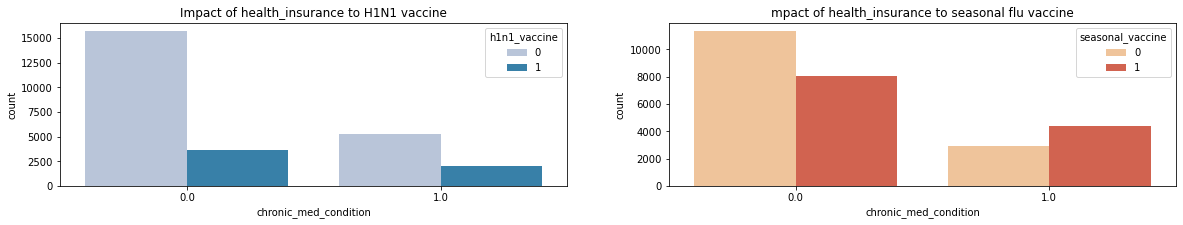

In [199]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.countplot(x='chronic_med_condition',hue='h1n1_vaccine',palette='PuBu',data=df)
plt.title('Impact of health_insurance to H1N1 vaccine')

plt.subplot(1,2,2)
sns.countplot(x='chronic_med_condition',hue='seasonal_vaccine',palette='OrRd',data=df)
plt.title('mpact of health_insurance to seasonal flu vaccine')

In [200]:
df.query('chronic_med_condition==1')['h1n1_vaccine'].value_counts(normalize=True)

0    0.724554
1    0.275446
Name: h1n1_vaccine, dtype: float64

In [201]:
df.query('chronic_med_condition==0')['h1n1_vaccine'].value_counts(normalize=True)

0    0.811196
1    0.188804
Name: h1n1_vaccine, dtype: float64

In [202]:
df.query('chronic_med_condition==1')['seasonal_vaccine'].value_counts(normalize=True)

1    0.603567
0    0.396433
Name: seasonal_vaccine, dtype: float64

In [203]:
df.query('chronic_med_condition==0')['seasonal_vaccine'].value_counts(normalize=True)

0    0.586187
1    0.413813
Name: seasonal_vaccine, dtype: float64

### Dependency of Health insurance yes/no

**Conclusions**
- `There ist a strong correlation between having a health insurance and vacciness readiness`

In [ ]:
df.health_insurance.value_counts()

In [ ]:
df_ins=df.groupby(['health_insurance'])['h1n1_vaccine'].sum()
df_ins

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.countplot(x='health_insurance',hue='h1n1_vaccine',palette='PuBu',data=df)
plt.title('Impact of health_insurance to H1N1 vaccine')

plt.subplot(1,2,2)
sns.countplot(x='health_insurance',hue='seasonal_vaccine',palette='OrRd',data=df)
plt.title('mpact of health_insurance to seasonal flu vaccine')

### Dependency of education

In [ ]:
df.education.value_counts(normalize=True)

In [ ]:
df['education_rank']=df.education.apply(lambda x: 1 if x=='< 12 Years' else 2 if x=='12 Years' else 3 
                                        if x=='Some College'else 4 if x=='College Graduate' else 0)

In [ ]:
df=df.sort_values('education_rank')

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x='education',y='h1n1_vaccine',data=df,palette='PuBu')
plt.title('H1N1 vaccine in % in dependency of the education level')
plt.xlabel("Education Level")
plt.ylabel("Vaccination rate for H1N1")

plt.subplot(1,2,2)
sns.barplot(x='education',y='seasonal_vaccine',data=df,palette='OrRd')
plt.title('Seasonal vaccine in % in dependency of the education level')
plt.xlabel("Education Level")
plt.ylabel("Vaccination rate for Seasonal Flu")

### In dependency of the Race

In [ ]:
df.race.value_counts(normalize=True)

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x='race',y='h1n1_vaccine',data=df,palette='PuBu')
plt.title('H1N1 vaccine in % in dependency of the race')
plt.xlabel("Race")
plt.ylabel("Vaccination rate for H1N1")

plt.subplot(1,2,2)
sns.barplot(x='race',y='seasonal_vaccine',data=df,palette='OrRd')
plt.title('Seasonal vaccine in % in dependency of the race')
plt.xlabel("Education Level")
plt.ylabel("Vaccination rate for Seasonal Flu")

### In dependency of income_poverty

In [ ]:
df.income_poverty.value_counts(normalize=True)


In [ ]:
df['income_rank']=df.income_poverty.apply(lambda x: 1 if x=='Below Poverty' else 2 if x=='<= $75,000, Above Poverty' 
                                     else 3 if x=='> $75,000' else 0)

In [ ]:
df=df.sort_values('income_rank')

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x='income_poverty',y='h1n1_vaccine',data=df,palette='PuBu')
plt.title('H1N1 vaccine in % in dependency of the income')
plt.xlabel("Race")
plt.ylabel("Vaccination rate for H1N1")

plt.subplot(1,2,2)
sns.barplot(x='income_poverty',y='seasonal_vaccine',data=df,palette='OrRd')
plt.title('Seasonal vaccine in % in dependency of the income')
plt.xlabel("Education Level")
plt.ylabel("Vaccination rate for Seasonal Flu")

### rent or own

In [204]:
df.rent_or_own.value_counts(normalize=True)

Own     0.777998
Rent    0.222002
Name: rent_or_own, dtype: float64

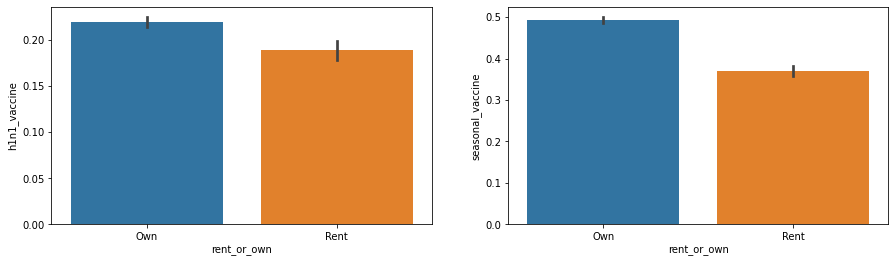

In [205]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.barplot(x='rent_or_own', y='seasonal_vaccine', data=df,ax=ax[1])
sns.barplot(x='rent_or_own', y='h1n1_vaccine', data=df,ax=ax[0])
plt.show()

### Region / Census

**Conclusions**
- `There is no significant correlation`

In [ ]:
df.census_msa.value_counts()

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.barplot(x='census_msa', y='seasonal_vaccine', data=df,ax=ax[1],palette='OrRd')
sns.barplot(x='census_msa', y='h1n1_vaccine', data=df,ax=ax[0],palette='PuBu')
plt.show()

### Geo Region

**Conclusions**
- `There regio has an impact to the attitude against vaccine.`


In [ ]:
region_list=df.hhs_geo_region.to_list()

In [ ]:
pd.pivot_table(df, values='h1n1_vaccine', index='seasonal_vaccine', columns='hhs_geo_region',margins=True)

In [ ]:
pd.pivot_table(df, values='seasonal_vaccine', index='h1n1_vaccine', columns='hhs_geo_region',margins=True)

In [ ]:
g=sns.displot(df, x="hhs_geo_region",hue='h1n1_vaccine',  palette="PuBu")
e=sns.displot(df, x="hhs_geo_region",hue='seasonal_vaccine',  palette="PuBu")
e.fig.set_size_inches(15,6)
g.fig.set_size_inches(15,6)
plt.title('')
plt.xlabel("Region")
plt.ylabel("Vaccinequote (absolut)");

In [ ]:
pd.pivot_table(df, values='seasonal_vaccine', index='h1n1_vaccine', columns='hhs_geo_region',margins=True)

## Modify categorical Features

In [304]:
recc_h1n1_dummy=pd.get_dummies(df['doctor_recc_h1n1'], prefix='RECC', drop_first=True)

In [305]:
recc_seas_dummy=pd.get_dummies(df['doctor_recc_seasonal'], prefix='RECCS', drop_first=True)

In [306]:
insurance_dummy=pd.get_dummies(df['health_insurance'], prefix='H', drop_first=True)

In [307]:
sex_dummy= pd.get_dummies(df['sex'], prefix='S', drop_first=True)

In [308]:
race_dummy=pd.get_dummies(df['race'], prefix='R', drop_first=True)

In [309]:
age_dummy=pd.get_dummies(df['age_group'], prefix='AGE', drop_first=True)

In [310]:
education_dummy=pd.get_dummies(df['education'], prefix='E', drop_first=True)

In [311]:
region_dummy= pd.get_dummies(df['hhs_geo_region'], prefix='R', drop_first=True)

In [312]:
poverty_dummy= pd.get_dummies(df['income_poverty'], prefix='P', drop_first=True)

In [313]:
marital_status_dummy=pd.get_dummies(df['marital_status'], prefix='M', drop_first=True)

In [314]:
rent_or_own_dummy=pd.get_dummies(df['rent_or_own'], prefix='OWN', drop_first=True)

In [315]:
employment_dummy=pd.get_dummies(df['employment_status'], prefix='EMP', drop_first=True)

In [316]:
city_dummy=pd.get_dummies(df['census_msa'], prefix='CITY', drop_first=True)

In [317]:
df_dum = df.drop(['sex','race','age_group','education','hhs_geo_region','income_poverty',
                         'marital_status','rent_or_own','employment_status','census_msa',
                 'health_insurance','doctor_recc_h1n1', 'doctor_recc_seasonal' ], axis=1) 

In [318]:
df_dum = pd.concat([df_dum,sex_dummy,race_dummy,age_dummy,education_dummy,region_dummy,poverty_dummy,marital_status_dummy,
                   rent_or_own_dummy,employment_dummy,city_dummy,
                   recc_h1n1_dummy,recc_seas_dummy,insurance_dummy], axis=1) 

### Check Dates

In [321]:
#First we create a new DataFrame with only numerical features
numerics = ['int64', 'float64','uint8']

num_df = df_dum.select_dtypes(include=numerics)

<AxesSubplot:title={'center':'Correlation of variables'}>

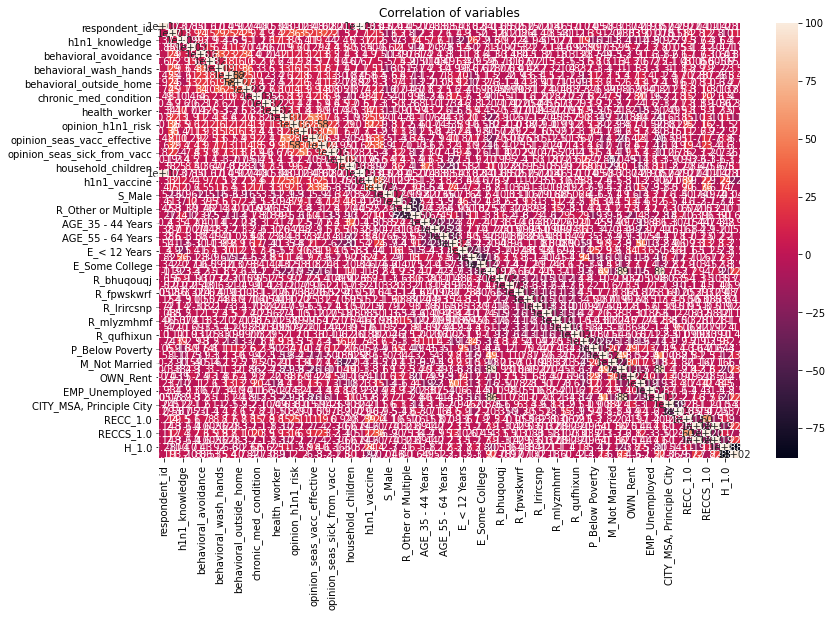

In [233]:
#Korrelationsanalyse
corr = num_df
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr()*100,vmax=100,annot=True)
#plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

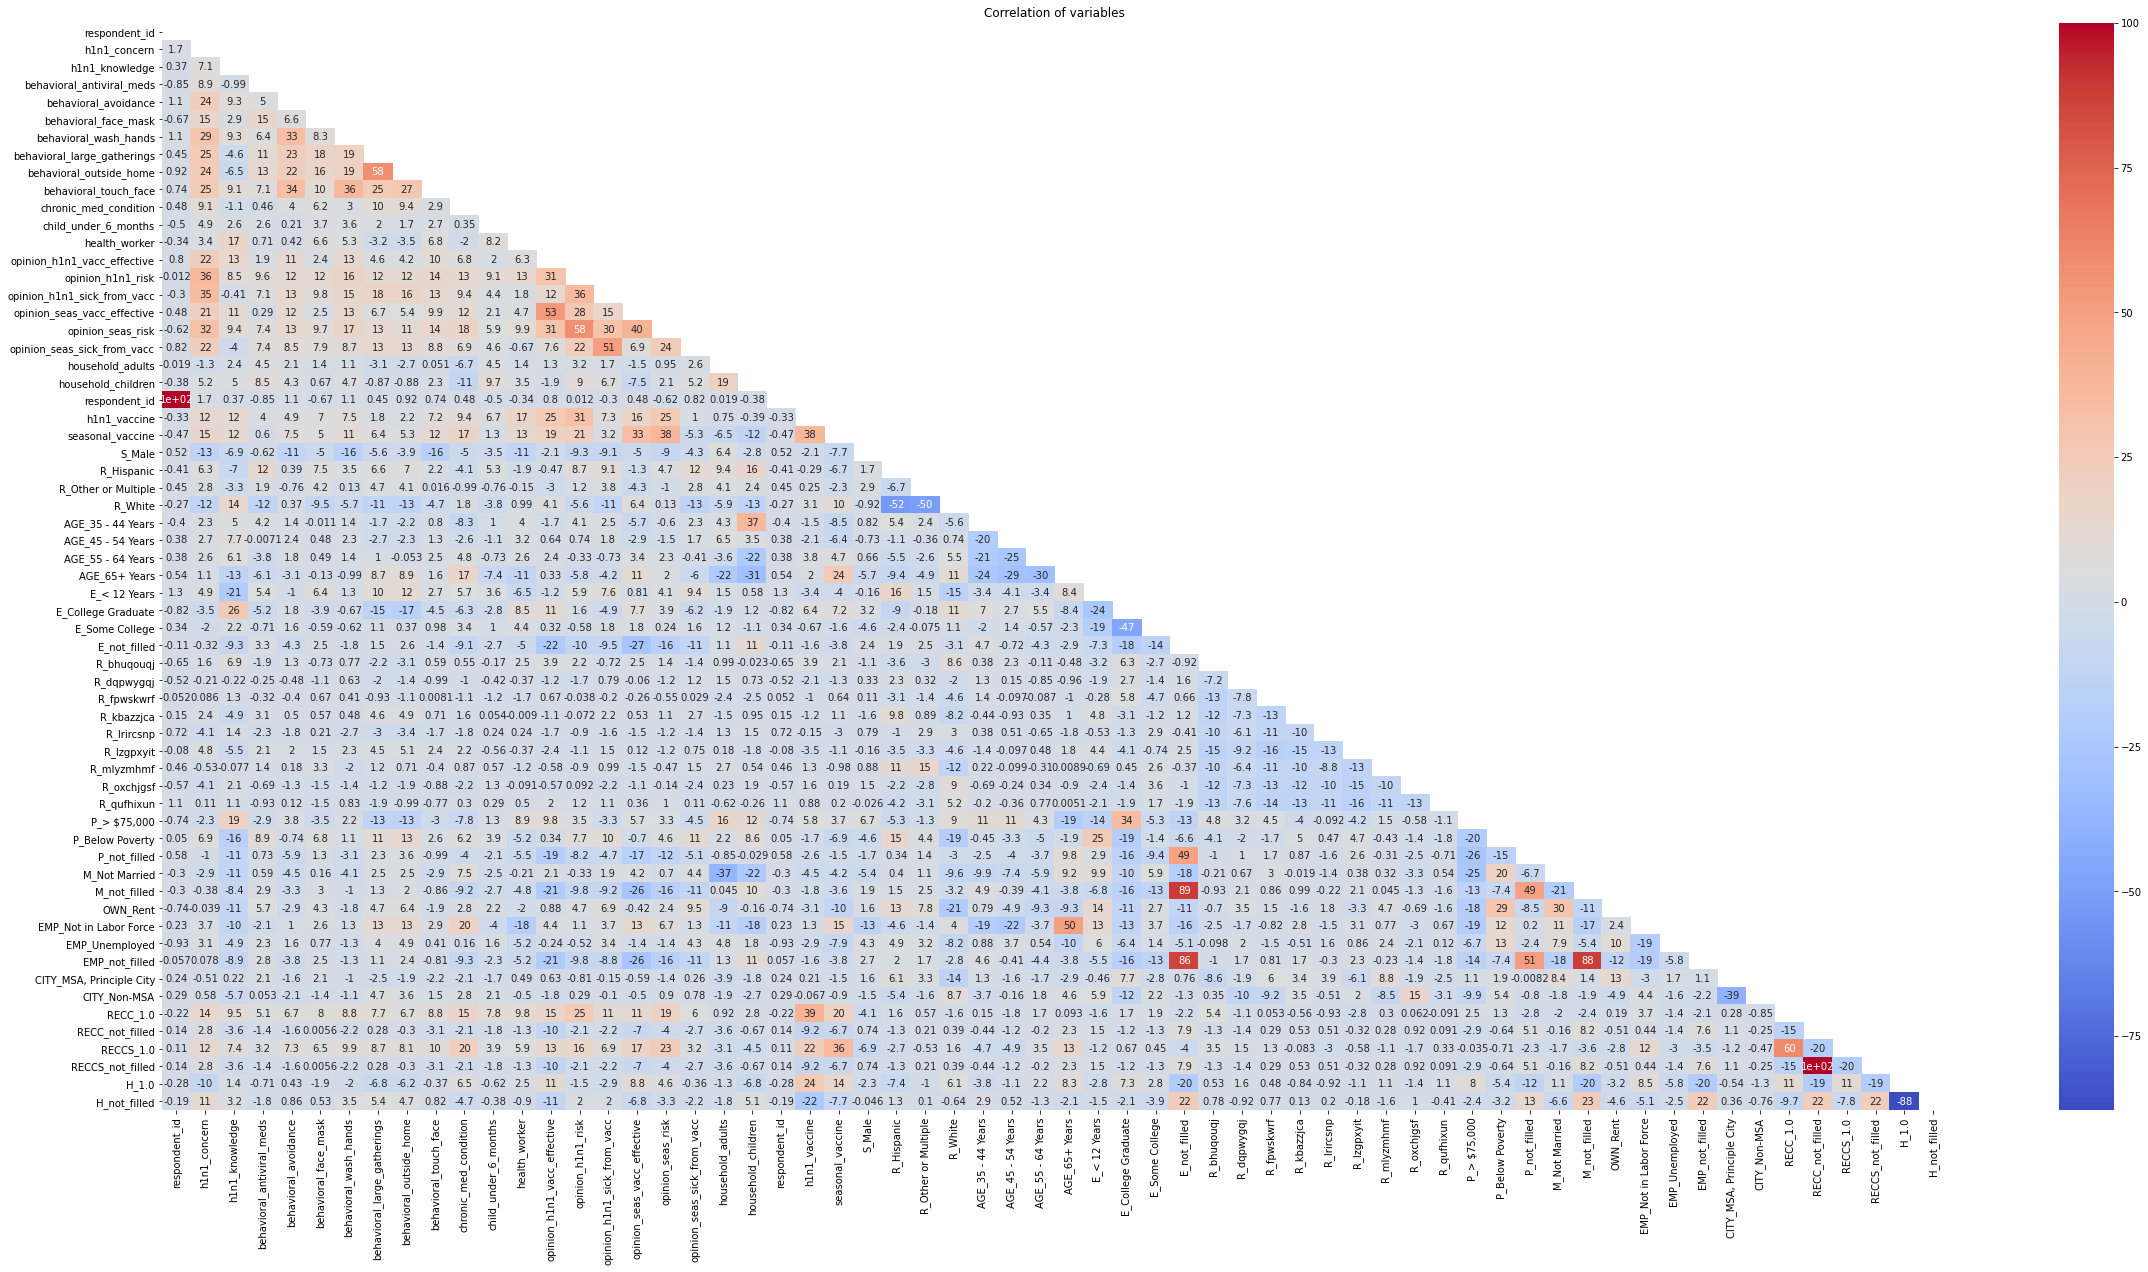

In [234]:
mask = np.triu(num_df.corr())
plt.figure(figsize=(40,20))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr()*100,vmax=100.0,mask=mask,annot=True,cmap='coolwarm')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

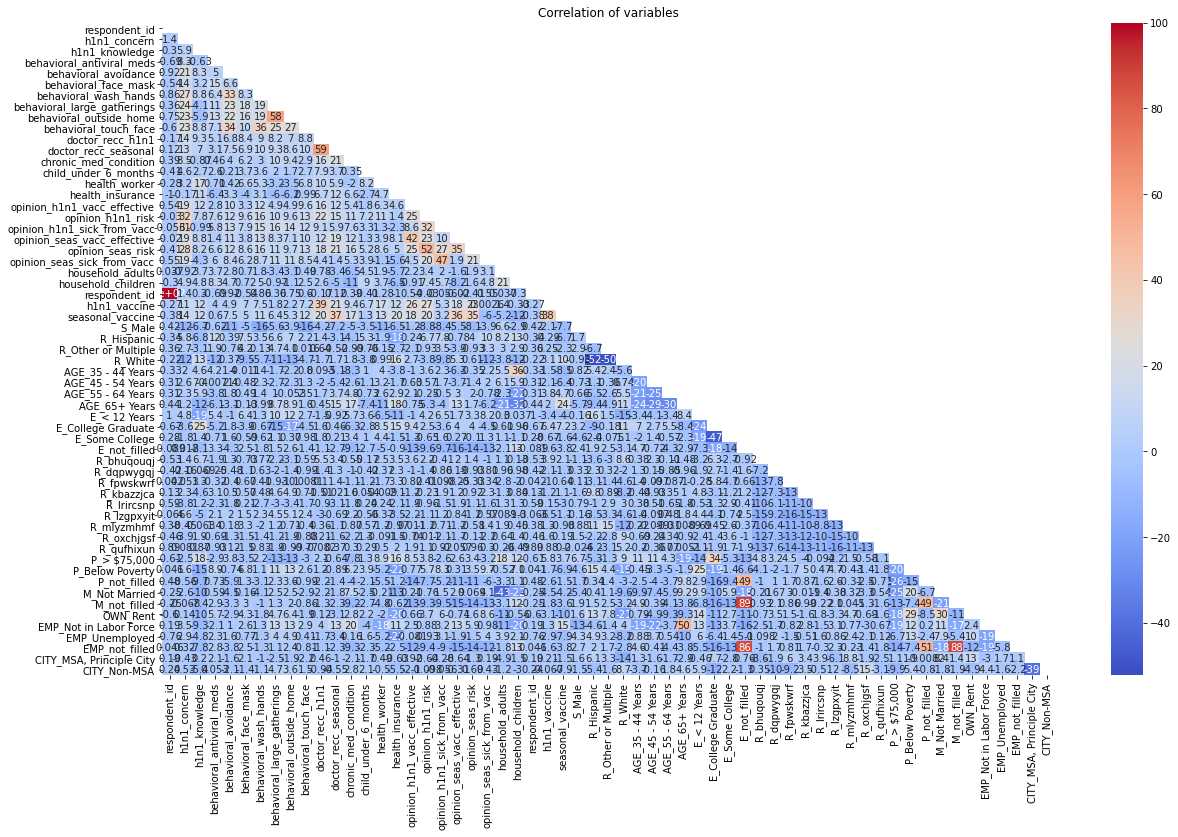

In [194]:

mask = np.triu(num_df.corr())
plt.figure(figsize=(20,12))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(method='kendall')*100,vmax=100.0,mask=mask,annot=True,cmap='coolwarm')
plt.savefig('correlogram_simple.png')
plt.show

# Feature Importance

I will start with different methods for feature selection. Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [322]:
len(num_df.columns)

64

In [323]:
featurelist=[i for i in num_df.columns if i not in ('seasonal_vaccine','h1n1_vaccine')]

In [261]:
X=num_df.iloc[:,np.r_[1:22,24:57]]
y=num_df.iloc[:,np.r_[22,23]]

In [246]:
num_feats=30

## Pearson Correlation 

In [247]:
y=y['seasonal_vaccine']
y=y_1

In [248]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y, num_feats)
print(str(len(cor_feature)), 'selected features')

cor_feature

30 selected features


['AGE_55 - 64 Years',
 'behavioral_face_mask',
 'opinion_seas_sick_from_vacc',
 'behavioral_outside_home',
 'AGE_45 - 54 Years',
 'behavioral_large_gatherings',
 'household_adults',
 'R_Hispanic',
 'P_Below Poverty',
 'E_College Graduate',
 'behavioral_avoidance',
 'S_Male',
 'EMP_Unemployed',
 'AGE_35 - 44 Years',
 'R_White',
 'OWN_Rent',
 'behavioral_wash_hands',
 'household_children',
 'h1n1_knowledge',
 'behavioral_touch_face',
 'health_worker',
 'EMP_Not in Labor Force',
 'h1n1_concern',
 'chronic_med_condition',
 'opinion_h1n1_vacc_effective',
 'RECC_1.0',
 'opinion_h1n1_risk',
 'AGE_65+ Years',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk']

## Recursive Feature Elimination

In [249]:
X_norm = StandardScaler().fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

rfe_feature

Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.
30 selected features


['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_wash_hands',
 'behavioral_touch_face',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_children',
 'R_Other or Multiple',
 'R_White',
 'AGE_35 - 44 Years',
 'AGE_45 - 54 Years',
 'AGE_55 - 64 Years',
 'AGE_65+ Years',
 'E_< 12 Years',
 'E_College Graduate',
 'E_not_filled',
 'R_lrircsnp',
 'P_> $75,000',
 'M_Not Married',
 'M_not_filled',
 'OWN_Rent',
 'EMP_Not in Labor Force',
 'EMP_Unemployed',
 'EMP_not_filled',
 'CITY_Non-MSA',
 'RECC_1.0']

## Lasso SelectFromModel

In [250]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

embeded_lr_feature

14 selected features


['h1n1_knowledge',
 'behavioral_touch_face',
 'chronic_med_condition',
 'health_worker',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'R_White',
 'AGE_45 - 54 Years',
 'AGE_55 - 64 Years',
 'AGE_65+ Years',
 'EMP_not_filled',
 'RECC_1.0']

## Tree Based Selection

In [251]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

embeded_rf_feature

13 selected features


['h1n1_concern',
 'h1n1_knowledge',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'respondent_id',
 'AGE_65+ Years',
 'RECC_1.0']

# Modelling - Logistic Regression

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [254]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

## only numeric features

In [255]:
full_pipeline = Pipeline([
    ("estimators", estimators),
])

In [262]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED
)

In [263]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

[array([[0.9267841 , 0.0732159 ],
        [0.90412804, 0.09587196],
        [0.71112813, 0.28887187],
        ...,
        [0.92614395, 0.07385605],
        [0.83700419, 0.16299581],
        [0.91595194, 0.08404806]]),
 array([[0.8364406 , 0.1635594 ],
        [0.45728814, 0.54271186],
        [0.12566737, 0.87433263],
        ...,
        [0.86195062, 0.13804938],
        [0.81758447, 0.18241553],
        [0.2319593 , 0.7680407 ]])]

In [265]:
# result-> array for both of the labels
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [266]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
6728,0.073216,0.163559
16516,0.095872,0.542712
3106,0.288872,0.874333
16981,0.475568,0.853891
19111,0.165286,0.717613


In [267]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

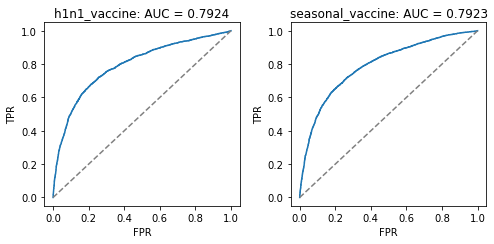

In [268]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [269]:
roc_auc_score(y_test, y_preds)


0.792354385328041

## all features

In [273]:
X=df_dum.iloc[:,np.r_[1:24,26:63]]
y=df_dum.iloc[:,np.r_[24,25]]

In [293]:
numeric_cols = X.columns[X.dtypes != "object"].values


In [294]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [295]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [296]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED
)

In [297]:
# Train model
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'R_mlyzmhmf', 'R_oxchjgsf', 'R_qufhixun', 'P_> $75,000',
       'P_Below Poverty', 'P_not_filled', 'M_Not Married', 'M_not_filled',
       'OWN_Rent', 'EMP_Not in Labor Force', 'EMP_Unemployed',
       'EMP_not_filled', 'CITY_MSA, Principle City', 'CITY_Non-MSA',
       'RECC_1.0', 'RECC

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)
y_preds.shape: (8814, 2)


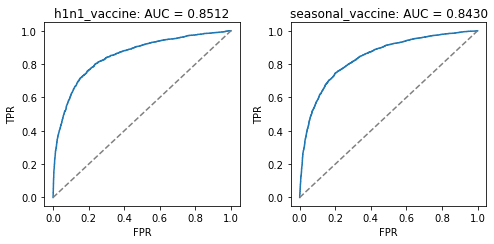

In [300]:
# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

# result-> array for both of the labels
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [299]:
roc_auc_score(y_test, y_preds)

0.8470771444840658

## set of features

In [326]:
X=df_dum.iloc[:,np.r_[1,2,10,12:19,26:39,60:66]]
y=df_dum.iloc[:,np.r_[24,25]]

numeric_cols = X.columns[X.dtypes != "object"].values

In [327]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

In [328]:
# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [329]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [330]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED
)

In [331]:
# Train model
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'chronic_med_condition',
       'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_...
       'household_size', 'S_Male', 'R_Hispanic', 'R_Other or Multiple',
       'R_White', 'AGE_35 - 44 Years', 'AGE_45 - 54 Years',
       'AGE_55 - 64 Years', 'AGE_65+ Years', 'E_< 12 Years',
       'E_College Graduate', 'E_Some College', 'RECC_1.0',
       'RECC_not_filled', 'RECCS_1.0', 'REC

In [332]:
# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

[array([[0.9811345 , 0.0188655 ],
        [0.95998981, 0.04001019],
        [0.90003617, 0.09996383],
        ...,
        [0.98039162, 0.01960838],
        [0.96641905, 0.03358095],
        [0.90219496, 0.09780504]]),
 array([[0.91757941, 0.08242059],
        [0.64739921, 0.35260079],
        [0.20205456, 0.79794544],
        ...,
        [0.90790794, 0.09209206],
        [0.95427739, 0.04572261],
        [0.08529149, 0.91470851]])]

In [333]:
# result-> array for both of the labels
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)
y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
6728,0.018866,0.082421
16516,0.040010,0.352601
3106,0.099964,0.797945
16981,0.704868,0.914502
19111,0.118322,0.617211


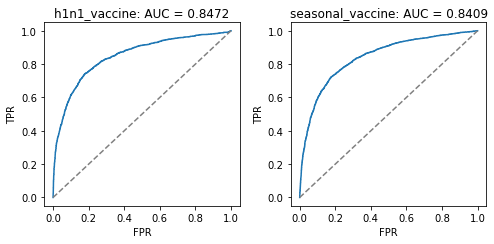

In [334]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [335]:
roc_auc_score(y_test, y_preds)

0.8440406022193474

# Modelevaluation

In [394]:
X=df_dum.iloc[:,np.r_[1:21,23,26:63]]
y=df_dum.iloc[:,np.r_[24,25]]

numeric_cols = X.columns[X.dtypes != "object"].values

In [371]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED
)

In [395]:
# META CODE
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))

In [396]:
# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

clf.fit(X, y)

ValueError: feature_names may not contain [, ] or <

# Modelevaluation

In [388]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute 
    results['roc_train'] = roc_auc_score(y_train[:300],predictions_train)
        
    # TODO: Compute 
    results['roc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Model Evaluation

Let's train and test the models on training sets of different sizes to see how it affects their runtime and predictive performance (both on the test, and training sets).

In [389]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [390]:
# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

In [391]:
# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

In [392]:
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 179 samples.
DecisionTreeClassifier trained on 1789 samples.
DecisionTreeClassifier trained on 17893 samples.
SVC trained on 179 samples.
SVC trained on 1789 samples.
SVC trained on 17893 samples.
AdaBoostClassifier trained on 179 samples.
AdaBoostClassifier trained on 1789 samples.
AdaBoostClassifier trained on 17893 samples.


In [393]:
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
train_time,0.007764,0.019890,0.208342
pred_time,0.009913,0.009697,0.010511
acc_train,0.923333,1.000000,1.000000
acc_test,0.765033,0.754595,0.744044
roc_train,0.886754,1.000000,1.000000
roc_test,0.626856,0.627051,0.635165


SVC


,1%,10%,100%
train_time,0.007677,0.131056,16.411758
pred_time,0.087052,0.563465,5.947602
acc_train,0.823333,0.823333,0.823333
acc_test,0.787497,0.787497,0.787497
roc_train,0.500000,0.500000,0.500000
roc_test,0.500000,0.500000,0.500000


AdaBoostClassifier


,1%,10%,100%
train_time,0.085577,0.210270,1.052670
pred_time,0.097760,0.095906,0.099888
acc_train,0.910000,0.883333,0.870000
acc_test,0.774790,0.826639,0.833787
roc_train,0.871247,0.721679,0.713582
roc_test,0.619602,0.663242,0.683764
